In [8]:
#Oppgave / Arbeidskrav 4
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

Vi har med en eksponensialfunksjon å gjøre. Hvis vi vil regne på denne bruker vi sympyversjonen av denne funksjonen `sp.exp()`. Hvis vi vil tegne den bruker vi numpy utgaven `np.exp()`. For å kunne definere én funksjon som veksler mellom disse to versjonene kan vi bake "type funksjon" inn i definisjonen:

**Oppgave**

*Beregn gjennomsnitts- og grenseproduktiviteten til arbeidskraft for produktfunksjon (1), og tegn disse i en figur. Forklar figuren. For hvilken verdi av $N$ er grenseproduktiviteten høyest?  (Hint: husk hvordan vi tegnet sympy uttrykk i matplotlib ved å bruke `sp.lambdify()` i forelesning 5).*

In [9]:
#Oppgave / Arbeidskrav 4

N, A = sp.symbols("N A", positive=True, real=True)

def produksjon (N, A):
    return 1000*(sp.exp(N)/(A+sp.exp(N)))

def produksjondiff(N,A):
    return sp.diff(produksjon(N,A),N)

In [61]:
#Oppgave / Arbeidskrav 4

produkt_eq = sp.lambdify((N,A), produksjon(N,A))
derivertp = sp.lambdify((N,A), produksjondiff(N,A))

derivert = derivertp(n, 200)

In [17]:
def mean(N,A):
    return prod(sp,N,A)/N

meanproduktivitet = sp.lambdify((N,A), mean(N,A))

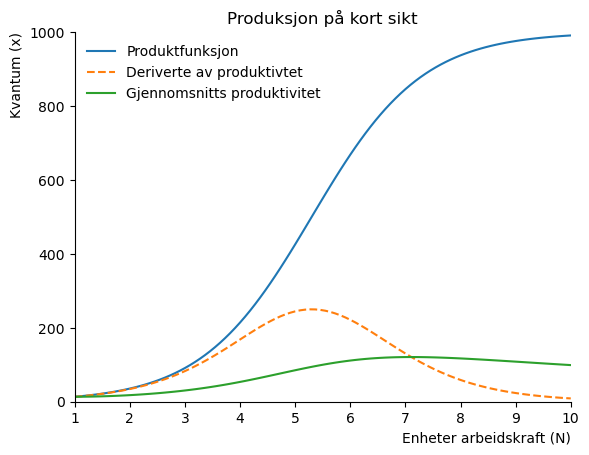

In [62]:
#Oppgave / Arbeidskrav 4

n=np.linspace(1,10,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kvantum (x)', loc='top')
ax.set_xlabel('Enheter arbeidskraft (N)', loc='right')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

#plott funksjonen

ax.plot(n, prod(np,n,200), label='Produktfunksjon')
ax.plot(n, derivertp(n,200), linestyle="dashed", label="Deriverte av produktivtet")
ax.plot(n, meanproduktivitet(n, 200), label="Gjennomsnitts produktivitet")

# tittel
ax.set_title('Produksjon på kort sikt')

#vis navnene på plottene:
ax.legend(loc='best',frameon=False);

In [63]:
#Oppgave / Arbeidskrav 4

print(np.max(derivert))

max_n = n[derivert.argmax()]
print(max_n)
#Her ser vi at den maksimale kvantum 5.2727 arbeidere kan produsere er 249.9590
#Og at den optimale mengden med arbeidskraft er 5.2727
#Disse tallene viser oss hvilken mengde med arbeidskraft som vil være mest profitable for produksjonen på kort sikt.

249.9590761602292
5.2727272727272725
